In [9]:
import random
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
def find_price(next_div, cost_of_cap, growth):
    return next_div / (cost_of_cap - growth)

In [22]:
growth_mean = .04
growth_std = .01
random.normalvariate(growth_mean, growth_std)

0.06639971693563489

In [62]:
def price_simulations(growth_mean: float = .04, growth_std: float = .01, n_iter = 10000):
    outputs = []
    for _ in range(n_iter):
        growth = random.normalvariate(growth_mean, growth_std)
        result = find_price(1, .09, growth)
        outputs.append((growth, result))
    return outputs

In [63]:
results = price_simulations()
max(results)

(0.07795485241986173, 83.02098362405629)

In [ ]:
df = pd.DataFrame(results, columns = ["Growth", "Price"])

<Axes: ylabel='Frequency'>

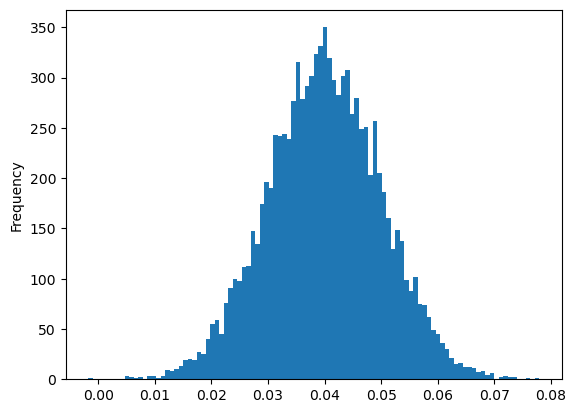

In [68]:
df["Growth"].plot.hist(bins = 100)

<Axes: ylabel='Frequency'>

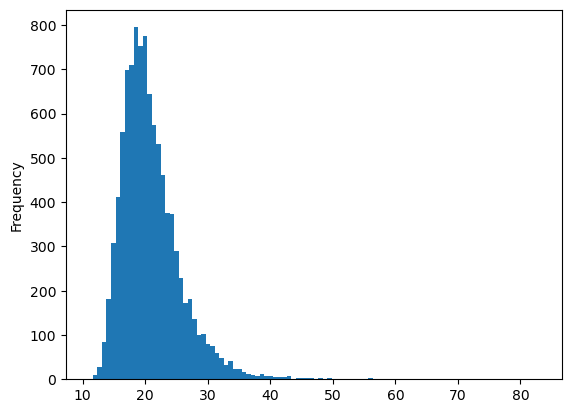

In [67]:
df["Price"].plot.hist(bins = 100)

In [69]:
df.quantile([i/20 for i in range(1, 20)])

,Growth,Price
0.05,0.023495,15.036480
0.10,0.027145,15.909541
0.15,0.029702,16.584324
0.20,0.031586,17.119251
0.25,0.033222,17.612329
0.30,0.034822,18.123063
0.35,0.036140,18.566501
0.40,0.037516,19.053563
0.45,0.038782,19.524481
0.50,0.039948,19.979137


In [91]:
def price_simulations_coc(growth_mean: float = .04, growth_std: float = .01, cost_of_cap_mean: float = .09, cost_of_cap_std: float = .02, n_iter = 10000):
    outputs = []
    for _ in range(n_iter):
        growth = random.normalvariate(growth_mean, growth_std)
        cost_of_cap = random.normalvariate(cost_of_cap_mean, cost_of_cap_std)
        if (cost_of_cap-.005) > growth:
            result = find_price(1, cost_of_cap, growth)
            outputs.append((growth, cost_of_cap, result))
    return outputs

In [92]:
results_coc = price_simulations_coc()

In [93]:
df_coc = pd.DataFrame(results_coc, columns= ["Growth", "Cost of Capital", "Price"])

<Axes: ylabel='Frequency'>

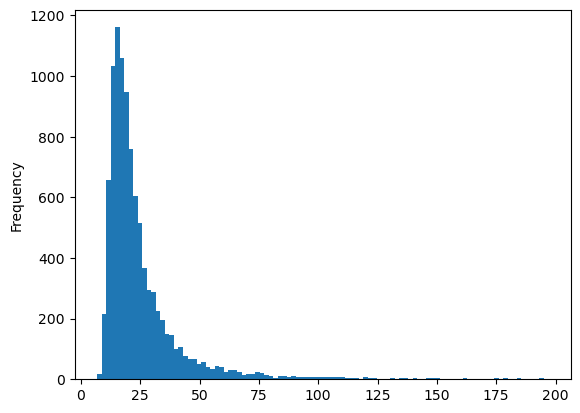

In [94]:
df_coc["Price"].plot.hist(bins = 100)

In [95]:
df_coc.quantile([i/20 for i in range(1, 20)])

,Growth,Cost of Capital,Price
0.05,0.023768,0.060279,11.655450
0.10,0.027391,0.066336,12.796604
0.15,0.029809,0.070473,13.699062
0.20,0.031687,0.074473,14.595900
0.25,0.033207,0.077461,15.389819
0.30,0.034661,0.080212,16.212370
0.35,0.036017,0.083009,17.025844
0.40,0.037450,0.085610,17.947753
0.45,0.038676,0.088075,18.838082
0.50,0.039878,0.090480,19.811329
